In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib

In [29]:
#Equity symbol and time period
symbol = "TATASTEEL.NS"  
start_date = "2013-07-05" 
end_date = "2023-07-06"  

In [30]:
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [31]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-05,25.580978,25.709599,25.114138,25.218939,8.789583,35367643
2013-07-08,25.047445,25.047445,24.580605,24.761625,8.630197,40983550
2013-07-09,25.018864,25.161774,24.785442,24.928354,8.688308,35587578
2013-07-10,25.056973,25.061737,24.318602,24.409113,8.507334,51591917
2013-07-11,24.961699,25.280867,24.685406,24.871189,8.668384,56890663


In [32]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2.465000e+03
mean,59.383421,60.237850,58.436566,59.300964,30.238063,8.807133e+07
std,32.698608,33.086185,32.204342,32.619164,28.148610,6.549479e+07
min,18.816547,19.626373,18.606947,18.888002,6.789866,0.000000e+00
25%,35.498966,36.046791,34.879688,35.441803,13.600831,4.676224e+07
50%,47.700001,48.394257,46.950001,47.605000,18.605892,6.811104e+07
75%,70.144997,71.199997,68.834999,69.919998,28.677242,1.079271e+08
max,151.940002,153.449997,149.175003,151.940002,119.644997,6.428460e+08


In [33]:
data.shape

(2465, 6)

In [34]:
#MACD
macd, macd_signal, _ = talib.MACD(data['Close'])

In [35]:
print(macd_signal)

Date
2013-07-05         NaN
2013-07-08         NaN
2013-07-09         NaN
2013-07-10         NaN
2013-07-11         NaN
                ...   
2023-06-28    1.169511
2023-06-30    1.102121
2023-07-03    1.064168
2023-07-04    1.033062
2023-07-05    1.014298
Length: 2465, dtype: float64


In [36]:
#Bullish Engulfing pattern
engulfing_pattern = talib.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close'])

In [37]:
bullish_engulfing_dates = data.index[engulfing_pattern > 0]

print("Bullish Engulfing pattern occurred on the following dates:")

for date in bullish_engulfing_dates:
    print(date)

Bullish Engulfing pattern occurred on the following dates:
2013-07-31 00:00:00
2013-08-07 00:00:00
2013-08-22 00:00:00
2013-08-28 00:00:00
2013-09-26 00:00:00
2013-10-29 00:00:00
2013-10-31 00:00:00
2013-11-07 00:00:00
2013-12-02 00:00:00
2013-12-13 00:00:00
2013-12-26 00:00:00
2013-12-30 00:00:00
2014-03-25 00:00:00
2014-04-11 00:00:00
2014-09-26 00:00:00
2014-10-08 00:00:00
2015-02-10 00:00:00
2015-04-17 00:00:00
2015-05-19 00:00:00
2015-10-07 00:00:00
2015-10-14 00:00:00
2015-12-21 00:00:00
2016-03-08 00:00:00
2016-04-11 00:00:00
2016-04-26 00:00:00
2016-05-18 00:00:00
2016-06-02 00:00:00
2016-06-20 00:00:00
2017-01-16 00:00:00
2017-02-20 00:00:00
2017-03-23 00:00:00
2017-06-09 00:00:00
2017-07-18 00:00:00
2017-10-05 00:00:00
2017-12-18 00:00:00
2018-02-08 00:00:00
2018-05-09 00:00:00
2019-02-19 00:00:00
2019-06-25 00:00:00
2019-08-23 00:00:00
2019-10-09 00:00:00
2019-10-17 00:00:00
2019-11-01 00:00:00
2020-02-20 00:00:00
2020-03-25 00:00:00
2020-04-16 00:00:00
2020-04-29 00:00:00
2

In [38]:
signals = np.zeros_like(macd)  

# 0: No signal, 1: Buy signal, -1: Sell signal


In [39]:
for i in range(1, len(data)):
    if macd[i] > macd_signal[i] and engulfing_pattern[i] > 0:
        signals[i] = 1  #Buy signal
    elif macd[i] < macd_signal[i] or engulfing_pattern[i] < 0:
        signals[i] = -1  #Sell signal


print("Trading Signals:")
for i in range(len(signals)):
    if signals[i] == 1:
        print("Buy signal at", data.index[i])
    elif signals[i] == -1:
        print("Sell signal at", data.index[i])


Trading Signals:
Buy signal at 2013-08-28 00:00:00
Sell signal at 2013-09-17 00:00:00
Sell signal at 2013-09-18 00:00:00
Sell signal at 2013-09-19 00:00:00
Sell signal at 2013-09-20 00:00:00
Sell signal at 2013-09-23 00:00:00
Sell signal at 2013-09-24 00:00:00
Sell signal at 2013-09-25 00:00:00
Sell signal at 2013-09-26 00:00:00
Sell signal at 2013-09-27 00:00:00
Sell signal at 2013-09-30 00:00:00
Sell signal at 2013-10-01 00:00:00
Sell signal at 2013-10-03 00:00:00
Sell signal at 2013-10-04 00:00:00
Sell signal at 2013-10-07 00:00:00
Sell signal at 2013-10-08 00:00:00
Sell signal at 2013-10-09 00:00:00
Sell signal at 2013-10-23 00:00:00
Sell signal at 2013-10-29 00:00:00
Sell signal at 2013-10-30 00:00:00
Buy signal at 2013-10-31 00:00:00
Buy signal at 2013-11-07 00:00:00
Sell signal at 2013-11-12 00:00:00
Buy signal at 2013-12-02 00:00:00
Sell signal at 2013-12-09 00:00:00
Sell signal at 2013-12-11 00:00:00
Sell signal at 2013-12-12 00:00:00
Sell signal at 2013-12-13 00:00:00
Sell si

In [41]:
#Returns
data['Returns'] = data['Close'].pct_change()

print(data['Returns'])

Date
2013-07-05         NaN
2013-07-08   -0.018134
2013-07-09    0.006733
2013-07-10   -0.020829
2013-07-11    0.018930
                ...   
2023-06-28    0.000000
2023-06-30    0.011287
2023-07-03    0.009821
2023-07-04   -0.006189
2023-07-05    0.004893
Name: Returns, Length: 2465, dtype: float64


In [43]:
#Strategy returns
strategy_returns = data['Returns'].values * np.roll(signals, 1)


data['StrategyReturns'] = strategy_returns


print(data['StrategyReturns'])

Date
2013-07-05         NaN
2013-07-08   -0.000000
2013-07-09    0.000000
2013-07-10   -0.000000
2013-07-11    0.000000
                ...   
2023-06-28   -0.000000
2023-06-30   -0.011287
2023-07-03   -0.009821
2023-07-04    0.006189
2023-07-05   -0.004893
Name: StrategyReturns, Length: 2465, dtype: float64


In [44]:
#Cumulative returns column
data['CumulativeReturns'] = 1


data['CumulativeReturns'] = data['CumulativeReturns'] * (1 + data['StrategyReturns']).cumprod()


print("Cumulative Returns:", data['CumulativeReturns'].iloc[-1])


Cumulative Returns: 0.2574865940143885


In [45]:
#Drawdown
data['RollMax'] = data['CumulativeReturns'].cummax()
data['Drawdown'] = (data['RollMax'] - data['CumulativeReturns']) / data['RollMax']

print("Drawdowns:")
print(data['Drawdown'])


Drawdowns:
Date
2013-07-05         NaN
2013-07-08    0.000000
2013-07-09    0.000000
2013-07-10    0.000000
2013-07-11    0.000000
                ...   
2023-06-28    0.780455
2023-06-30    0.782933
2023-07-03    0.785065
2023-07-04    0.783734
2023-07-05    0.784792
Name: Drawdown, Length: 2465, dtype: float64


In [46]:
max_drawdown = data['Drawdown'].max()
print("Maximum Drawdown:", max_drawdown)

Maximum Drawdown: 0.8088177026779483


In [47]:
avg_drawdown = data['Drawdown'].mean()
print("Average Drawdown:", avg_drawdown)

Average Drawdown: 0.5514463570435586


In [48]:
drawdown_duration = data[data['Drawdown'] > 0]['Drawdown'].count()
print("Drawdown Duration (in days):", drawdown_duration)

Drawdown Duration (in days): 2413


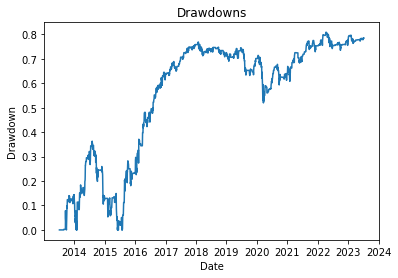

In [49]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['Drawdown'])
plt.title("Drawdowns")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

In [50]:
#Sharpe ratio
risk_free_rate = 0.05  
daily_returns = data['StrategyReturns'].dropna()
sharpe_ratio = (daily_returns.mean() - risk_free_rate) / daily_returns.std()

print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -2.81256280385018


In [51]:
annualized_sharpe_ratio = sharpe_ratio * np.sqrt(252)  #252 trading days in a year
print("Annualized Sharpe Ratio:", annualized_sharpe_ratio)

Annualized Sharpe Ratio: -44.64805035442869


In [53]:
risk_free_rates = [0.02, 0.04, 0.06] 
for rf_rate in risk_free_rates:
    sharpe_ratio_rf = (daily_returns.mean() - rf_rate) / daily_returns.std()
    print(f"Sharpe Ratio with Risk-Free Rate {rf_rate}: {sharpe_ratio_rf}")

Sharpe Ratio with Risk-Free Rate 0.02: -1.1380661559930423
Sharpe Ratio with Risk-Free Rate 0.04: -2.2543972545644673
Sharpe Ratio with Risk-Free Rate 0.06: -3.370728353135892


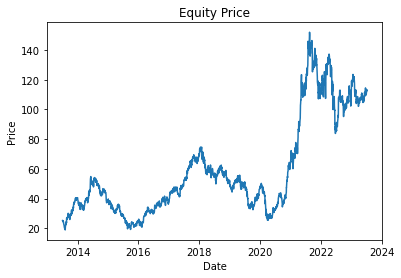

In [54]:
import matplotlib.pyplot as plt

plt.plot(data.index, data['Close'])
plt.title("Equity Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


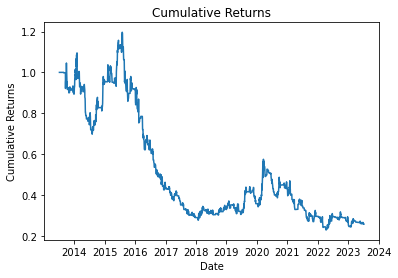

In [55]:
plt.plot(data.index, data['CumulativeReturns'])
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.show()


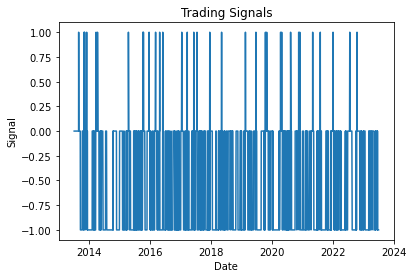

In [56]:
plt.plot(data.index, signals)
plt.title("Trading Signals")
plt.xlabel("Date")
plt.ylabel("Signal")
plt.show()
